# Exploratory Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import f_oneway
from scipy.stats import pearsonr
from explore import explore_bedrooms, square_footage_vs_logerror, explore_bathrooms, heating_cooling_vs_logerror, yearbuilt_vs_logerror
from wrangle import acquire_zillow, split_data, handles_missing_values

# To ignore FutureWarning specifically:
warnings.filterwarnings("ignore", category=FutureWarning)

### Acquire and Prep

In [29]:
# Acquire the Zillow dataset and store it in the DataFrame 'df'
df = acquire_zillow()

In [28]:
df.fips.value_counts()

fips
6037.0    33789
6059.0      583
6111.0        3
Name: count, dtype: int64

In [31]:
df.isna().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18665
calculatedbathnbr                 135
calculatedfinishedsquarefeet       81
finishedsquarefeet12              246
fips                                0
fullbathcnt                       135
garagecarcnt                    34335
garagetotalsqft                 34335
heatingorsystemtypeid           18470
latitude                            0
longitude                           0
lotsizesquarefeet                 366
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              18558
rawcensustractandblock              0
regionidcity                     1036
regionidcounty                      0
regionidneighborhood            33338
regionidzip                        26
roomcnt                             0
unitcnt                         18558
yearbuilt   

In [30]:
# Call the 'handle_missing_values' function to handle missing values in the DataFrame 'df'
# It retains columns with at least 50% non-null values and rows with at least 50% non-null values.
df = handles_missing_values(df, prop_required_column=0.30, prop_required_row=0.30)

In [4]:
# Split the DataFrame 'df' into training (train), validation (val), and test (test) sets.
# 'target' parameter is set to None, indicating that there is no specific target column for splitting.
# The default split ratio is 70% training, 20% validation, and 10% test.
train, val, test = split_data(df, target=None)

In [16]:
df.shape

(32045, 34)

1) Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g.  
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

# a) Does the number of bedrooms have a correlation with logerror?

Null hypothesis: The number of bedrooms has no correlation with logerror
Alternative hypothesis: The number of bedrooms has a correlation with logerror
BAR PLOT


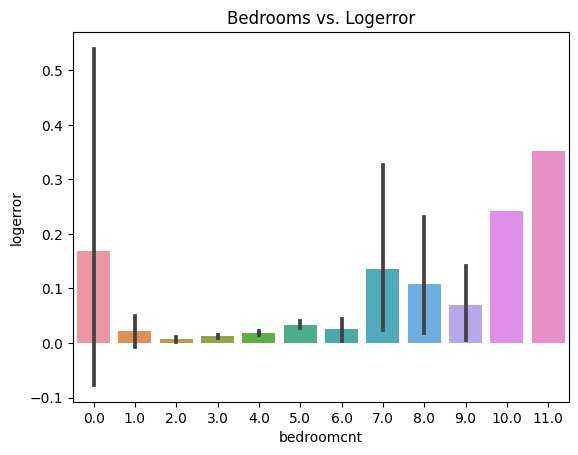

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.04052816117556195 and a p_value of 3.9374985828093286e-13


In [6]:
explore_bedrooms(df)

# b) Is there a relationship between the property's calculated square footage and logerror?

Null hypothesis: There is no relationship between the porpertys calculated square footage and logerror
Alternative hypothesis: There is a relationship between the porpertys calculated square footage and logerror
SCATTER PLOT


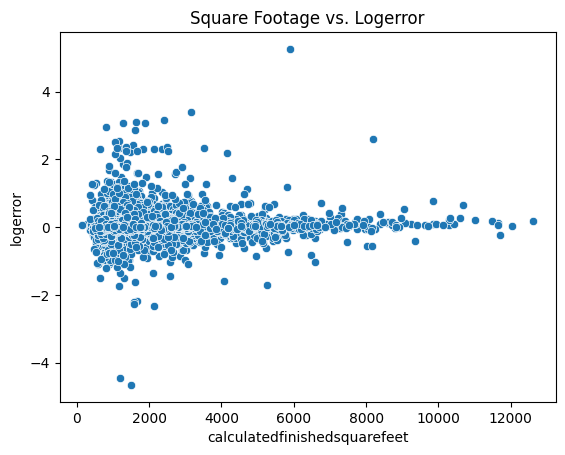

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.03887142097884526 and a p_value of 3.3839915147744495e-12


In [7]:
square_footage_vs_logerror(df)

# C) Does the number of bathrooms have a correlation with logerror?

Null hypothesis: The number of bathrooms has no correlation with logerror
Alternative hypothesis: The number of bathrooms has a correlation with logerror
BAR PLOT


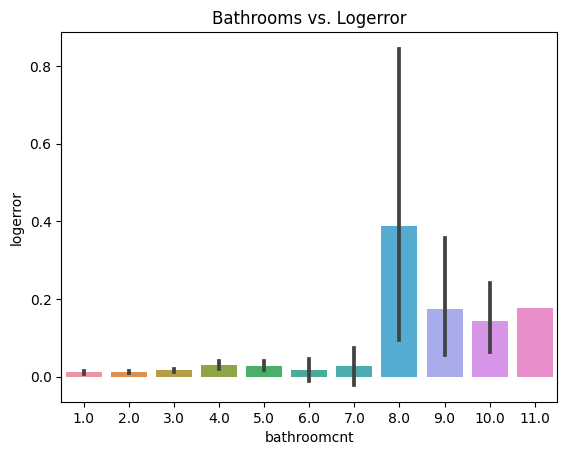

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.036684151191966 and a p_value of 5.071295652101681e-11


In [8]:
explore_bathrooms(df)

# d) Do properties with specific heating or cooling systems exhibit different logerror patterns?

Null hypothesis: Properties with specific heating or cooling systems do not exhibit different logerror patterns
Alternative hypothesis: Properties with specific heating or cooling systems exhibit different logerror patterns
BAR PLOT


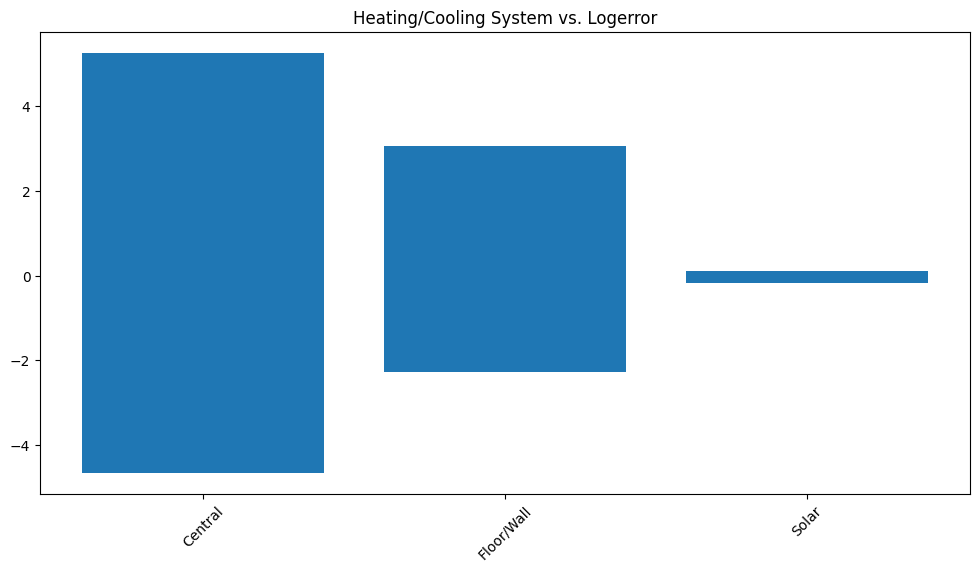

BOX PLOT


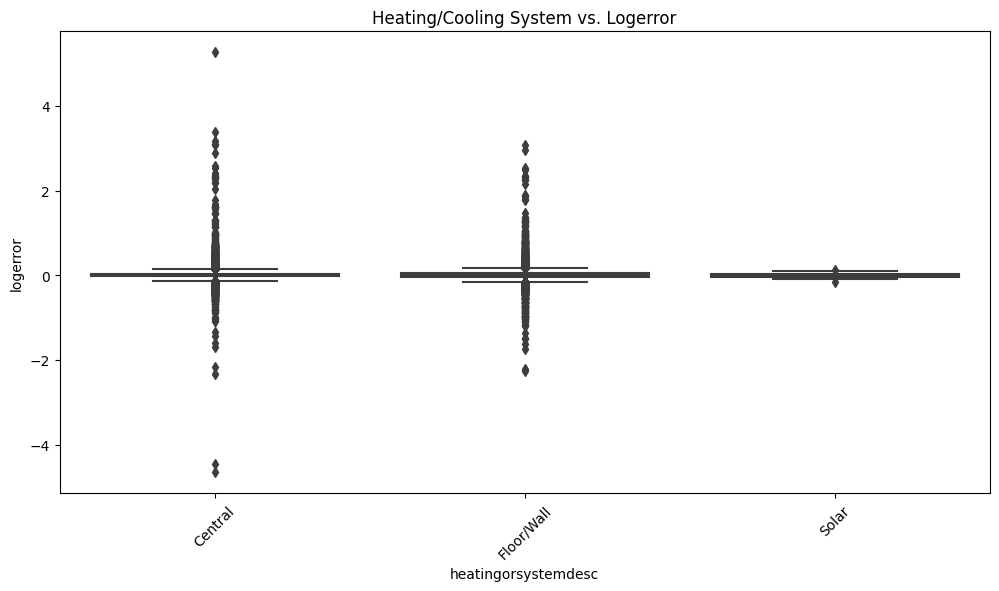

F-ONEWAY TEST
We reject the null hypothesis with an f_statistic of 0.39129463984036716 and a p_value of 0.6761841279126075


In [9]:
heating_cooling_vs_logerror(df)

# e) How does the year of construction (yearbuilt) relate to logerror?

Null hypothesis: The year of construction has no relation to logerror
Alternative hypothesis: The year of construction relates to logerror
SCATTER PLOT


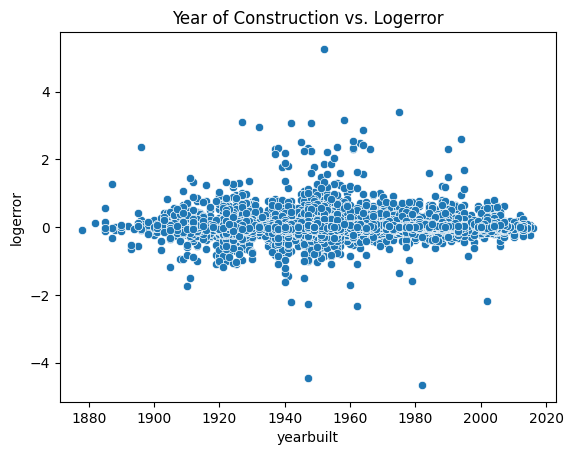

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.022387263513025495 and a p_value of 6.125684022899009e-05


In [10]:
yearbuilt_vs_logerror(df)

In [18]:
import pandas as pd
from scipy.stats import ttest_1samp

def analyze_zipcode_logerror(df, significance_level=0.05):
    zipcode = df.fips
    """
    Analyze mean logerror by zipcode and identify zipcodes with significantly different errors.

    Args:
    df (pd.DataFrame): DataFrame containing 'zipcode' and 'logerror' columns.
    significance_level (float): The significance level for t-tests. Default is 0.05.

    Returns:
    pd.DataFrame: DataFrame with results, including zipcodes with significantly different errors.
    """
    # Calculate the overall mean logerror
    overall_mean_logerror = df['logerror'].mean()

    # Create an empty DataFrame to store results
    results = pd.DataFrame(columns=['zipcode', 'Mean_Logerror', 'T-Statistic', 'P-Value'])

    # Loop through unique zipcodes and perform t-tests
    unique_zipcodes = df['zipcode'].unique()
    for zipcode in unique_zipcodes:
        zipcode_data = df[df['zipcode'] == zipcode]['logerror']
        t_statistic, p_value = ttest_1samp(zipcode_data, overall_mean_logerror)

        # Append results to the DataFrame
        results = results.append({
            'Zipcode': zipcode,
            'Mean_Logerror': zipcode_data.mean(),
            'T-Statistic': t_statistic,
            'P-Value': p_value
        }, ignore_index=True)

    # Identify zip codes with significantly different errors
    significantly_different = results[results['P-Value'] < significance_level]

    # Display the results
    print("Overall Mean Logerror:", overall_mean_logerror)
    print("Zip codes with significantly different errors:")
    print(significantly_different)

    return results

# Example usage:
# results_df = analyze_zipcode_logerror(your_dataframe)


In [19]:
analyze_zipcode_logerror(df)

KeyError: 'zipcode'

In [20]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,3.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential
6,1246926,12790562,3.0,4.0,9.0,3.0,3039.0,3039.0,6037.0,3.0,...,177527.0,220583.0,2016.0,43056.0,3104.19,6.037500e+13,-0.040966,2017-01-02,Central,Single Family Residential
7,1639362,11104527,3.0,4.0,8.0,3.0,2540.0,2540.0,6037.0,3.0,...,271715.0,430108.0,2016.0,158393.0,6103.36,6.037920e+13,0.005963,2017-01-02,Central,Single Family Residential
11,571930,11830315,1.0,2.0,4.0,1.0,1146.0,1146.0,6037.0,1.0,...,127960.0,273745.0,2016.0,145785.0,3739.02,6.037532e+13,-0.035085,2017-01-02,Floor/Wall,Single Family Residential
